In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [5]:
from sqlalchemy import create_engine, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
conn = engine.connect()

In [9]:
#view all tables using inspector
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
#Retrieve dataframe- Measurements
query = '''
        SELECT
            *
        FROM
            measurement
'''

In [28]:
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [82]:
#df.info()

In [32]:
#df.describe()

In [18]:
#Retrieve 2nd dataframe- Stations
query2 = '''
        SELECT
            *
        FROM
            station
'''

In [21]:
df2 = pd.read_sql(query2, conn)
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [33]:
#df2.describe()

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# This is the last date. 
df.date.max()

'2017-08-23'

In [27]:
# Retrieve last year with date time to get one year back
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
prev_year

datetime.date(2016, 8, 23)

In [41]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values and sort date.



query3 = '''
            SELECT
                date, prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'

                '''


In [44]:
df3 = pd.read_sql(query3, conn).sort_values('date')
df3.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [56]:
#Convert datetime from string to datetime, to make viewing easier
df3['Date'] = pd.to_datetime(df3.date)
df3.head()

,date,prcp,Date
0,2016-08-23,0.00,2016-08-23
1009,2016-08-23,NaN,2016-08-23
1529,2016-08-23,1.79,2016-08-23
704,2016-08-23,0.05,2016-08-23
361,2016-08-23,0.15,2016-08-23


In [54]:
df3.date.min()

'2016-08-23'

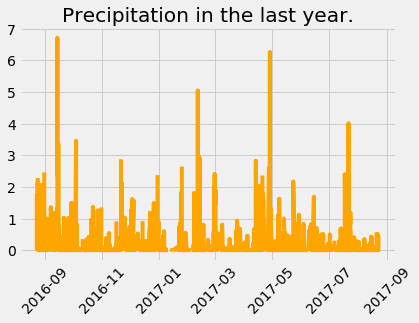

<Figure size 432x288 with 0 Axes>

In [62]:
#Plot the results using the DataFrame plot method.
plt.plot(df3.Date, df3.prcp, color = 'orange')
plt.xticks(rotation = 46)
plt.title('Precipitation in the last year.')
plt.figure()
plt.show()


In [ ]:
#Station Analysis




In [66]:
df.groupby('station').count()

,id,date,prcp,tobs
station,,,,
USC00511918,1979,1979,1932,1979
USC00513117,2709,2709,2696,2709
USC00514830,2202,2202,1937,2202
USC00516128,2612,2612,2484,2612
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00519523,2669,2669,2572,2669


In [67]:
df.groupby('station').size().sort_values()

station
USC00518838     511
USC00517948    1372
USC00511918    1979
USC00514830    2202
USC00516128    2612
USC00519523    2669
USC00513117    2709
USC00519397    2724
USC00519281    2772
dtype: int64

In [69]:
query4 = '''
            SELECT
                *
            FROM
                measurement
            WHERE
                station = 'USC00519281' AND
                date >= '2016-08-23' 

                '''

In [70]:
df5 = pd.read_sql(query4, conn)
df5.head()

,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0


In [80]:
len(df5)

352

In [81]:
np.sqrt(352)

18.76166303929372

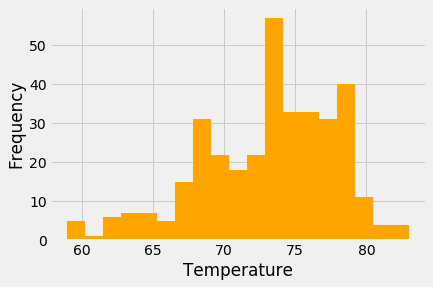

In [79]:
plt.hist(df5.tobs, bins = 19
         , color = 'orange')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()